In [1]:
!pip install pandas openpyxl

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("Uber_Cleaned.xlsx")

In [4]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour,Time Slot,Trip Completed ?
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,Yes
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Evening,Yes
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,Yes
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,Yes
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,Yes


In [5]:
import sqlite3

#create a sqlite3 database in memory or as a file

In [6]:
conn = sqlite3.connect("Uber_Cleaned.db")#this creates a file- based DB

#write dateframe into sqlite as a table

In [7]:
df.to_sql("uber_data", conn, if_exists="replace", index=False)

6745

#let us confirm that the data is loaded 

In [8]:
query = "SELECT * FROM uber_data LIMIT 5"

In [9]:
result = pd.read_sql_query(query, conn)

print(result)

   Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed  2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed  2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed  2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed  2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed  2016-07-13 08:33:16   

        Drop timestamp  Hour      Time Slot Trip Completed ?  
0  2016-07-11 13:00:00    11        Morning              Yes  
1  2016-07-11 18:47:00    17        Evening              Yes  
2  2016-07-12 09:58:00     9        Morning              Yes  
3  2016-07-12 22:03:00    21          Night              Yes  
4  2016-07-13 09:25:47     8  Early Morning              Yes  


#using sql count the no. of rows

In [10]:
pd.read_sql_query("SELECT COUNT(*) FROM uber_data", conn)

,COUNT(*)
0,6745


Unique Pickup Points

In [11]:
pd.read_sql_query("SELECT DISTINCT [Pickup point] FROM uber_data", conn)

,Pickup point
0,Airport
1,City


Top Pickup Points by Trip Count

In [12]:
query = """SELECT [Pickup point], COUNT (*) AS [trip count] FROM uber_data GROUP BY [Pickup point] ORDER BY [trip count] DESC LIMIT 5"""

 Top Pickup Points by Trip Count

In [13]:
pd.read_sql_query(query, conn)

,Pickup point,trip count
0,City,3507
1,Airport,3238


How many total trips were completed, cancelled, or had no cars available?

In [14]:
query = """SELECT [Status], COUNT (*) AS [Trip Count] FROM uber_data GROUP BY [Status] ORDER BY [Trip Count] DESC"""

In [15]:
pd.read_sql_query(query, conn)

,Status,Trip Count
0,Trip Completed,2831
1,No Cars Available,2650
2,Cancelled,1264


Which pickup point had the most cancelled trips?

In [16]:
query = """
SELECT [Pickup point], COUNT(*) AS "Cancelled Trips"
FROM uber_data
WHERE Status = 'Cancelled'
GROUP BY [Pickup point]
ORDER BY "Cancelled Trips" DESC
"""
pd.read_sql_query(query, conn)


,Pickup point,Cancelled Trips
0,City,1066
1,Airport,198


In [17]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Hour', 'Time Slot',
       'Trip Completed ?'],
      dtype='object')

How many trips were requested in each hour of the day?

In [18]:
query = """ SELECT [Hour], COUNT(*) AS [Total Trips] FROM uber_data GROUP BY [Hour] ORDER BY [Hour]"""

pd.read_sql_query(query, conn)

,Hour,Total Trips
0,0,99
1,1,85
2,2,99
3,3,92
4,4,203
5,5,445
6,6,398
7,7,406
8,8,423
9,9,431


Which time slot had the highest number of trip requests?

In [19]:
query = """SELECT [Time Slot], COUNT(*) AS [Trip count] FROM uber_data GROUP BY [Time Slot] ORDER BY [Trip Count] DESC"""

pd.read_sql_query(query, conn)

,Time Slot,Trip count
0,Evening,1893
1,Early Morning,1672
2,Night,947
3,Morning,845
4,Afternoon,810
5,Late Night,578


Which time slot had the highest number of trip requests?

In [20]:
query = """SELECT [Time Slot], [Status], COUNT(*) AS [Trip Count] FROM uber_data GROUP BY [Time Slot], [Status] ORDER BY [Time Slot], [Trip Count] DESC"""
pd.read_sql_query(query, conn)

,Time Slot,Status,Trip Count
0,Afternoon,Trip Completed,491
1,Afternoon,No Cars Available,228
2,Afternoon,Cancelled,91
3,Early Morning,Trip Completed,681
4,Early Morning,Cancelled,668
5,Early Morning,No Cars Available,323
6,Evening,No Cars Available,1127
7,Evening,Trip Completed,642
8,Evening,Cancelled,124
9,Late Night,No Cars Available,299


Which pickup point had the highest percentage of successful trips?

In [21]:
query = """SELECT [Pickup point], SUM(CASE WHEN [Status] = 'Trip Completed'THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [Completion %] FROM uber_data GROUP BY [Pickup point] ORDER BY [Completion %] DESC"""
completion_df = pd.read_sql_query(query, conn)

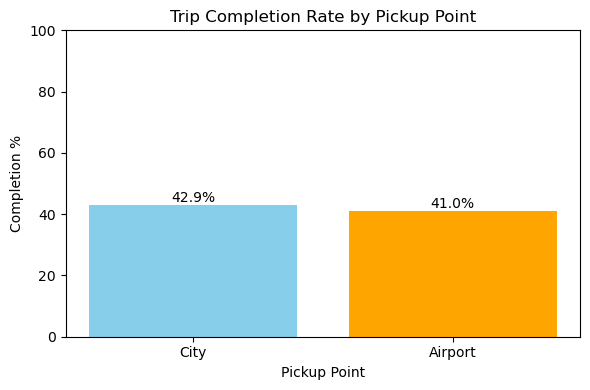

In [22]:
import matplotlib.pyplot as plt

# Step 1: Run the query and store the result
query = """
SELECT [Pickup point],
       SUM(CASE WHEN [Status] = 'Trip Completed' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [Completion %]
FROM uber_data
GROUP BY [Pickup point]
ORDER BY [Completion %] DESC
"""
completion_df = pd.read_sql_query(query, conn)

# Step 2: Extract data for plotting
pickup_points = completion_df["Pickup point"]
completion_rates = completion_df["Completion %"]

# Step 3: Plot with matplotlib
plt.figure(figsize=(6, 4))
bars = plt.bar(pickup_points, completion_rates, color=['skyblue', 'orange'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center')

# Add titles and labels
plt.title("Trip Completion Rate by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Completion %")
plt.ylim(0, 100)  # make the y-axis consistent for % values

# Show plot
plt.tight_layout()
plt.show()


In [23]:
query = """
SELECT 
  [Pickup point],
  SUM(CASE WHEN [Status] = 'Trip Completed' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [Completion %],
  SUM(CASE WHEN [Status] = 'Cancelled' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [Cancellation %],
  SUM(CASE WHEN [Status] = 'No Cars Available' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [No Cars Available %]
FROM uber_data
GROUP BY [Pickup point]
ORDER BY [Completion %] DESC
"""

pd.read_sql_query(query, conn)


,Pickup point,Completion %,Cancellation %,No Cars Available %
0,City,42.885657,30.396350,26.717993
1,Airport,40.982088,6.114886,52.903027


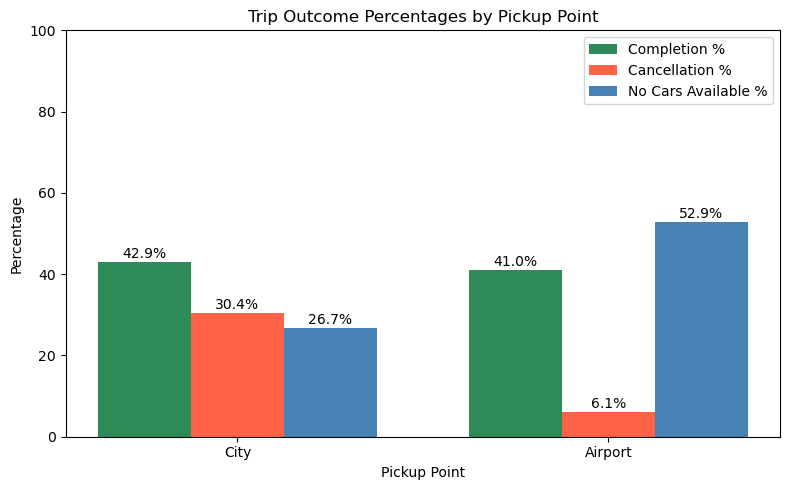

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Run your query and store result
query = """
SELECT 
  [Pickup point],
  SUM(CASE WHEN [Status] = 'Trip Completed' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [Completion %],
  SUM(CASE WHEN [Status] = 'Cancelled' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [Cancellation %],
  SUM(CASE WHEN [Status] = 'No Cars Available' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [No Cars Available %]
FROM uber_data
GROUP BY [Pickup point]
ORDER BY [Completion %] DESC
"""

df_percent = pd.read_sql_query(query, conn)

# Extract X and Y
labels = df_percent["Pickup point"]
completion = df_percent["Completion %"]
cancelled = df_percent["Cancellation %"]
no_cars = df_percent["No Cars Available %"]

# Plot settings
x = range(len(labels))
width = 0.25  # width of each bar

# Create figure and axis
plt.figure(figsize=(8, 5))

# Plot each group of bars
plt.bar([i - width for i in x], completion, width=width, label='Completion %', color='seagreen')
plt.bar(x, cancelled, width=width, label='Cancellation %', color='tomato')
plt.bar([i + width for i in x], no_cars, width=width, label='No Cars Available %', color='steelblue')

# X-axis setup
plt.xticks(x, labels)
plt.xlabel("Pickup Point")
plt.ylabel("Percentage")
plt.title("Trip Outcome Percentages by Pickup Point")
plt.ylim(0, 100)
plt.legend()

# Display bar values
for i in x:
    plt.text(i - width, completion[i] + 1, f"{completion[i]:.1f}%", ha='center')
    plt.text(i, cancelled[i] + 1, f"{cancelled[i]:.1f}%", ha='center')
    plt.text(i + width, no_cars[i] + 1, f"{no_cars[i]:.1f}%", ha='center')

plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [26]:
df = pd.read_excel("Uber_Cleaned.xlsx")

In [27]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour,Time Slot,Trip Completed ?
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,Yes
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Evening,Yes
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,Yes
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,Yes
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,Yes
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,Night,No
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,Night,No
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,Night,No
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,Night,No


Prepare the Data. We need to convert the time column to a date for SQL to group properly:
This adds a new column Request Date that contains only the date part. Many of our SQL charts (like daily cancellations or completion trend) need the date only — not the time. That’s why we create "Request Date".

In [28]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df['Request Date'] = df['Request timestamp'].dt.date

In [29]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour,Time Slot,Trip Completed ?,Request Date
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,Yes,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Evening,Yes,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,Yes,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,Yes,2016-07-12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,Yes,2016-07-13


Load Your Data into a SQL Database. Create a connection to a temporary in-memory SQL database


In [30]:
import sqlite3
conn = sqlite3.connect(":memory:")

Load the DataFrame into the SQL table named 'uber_data'. Now Excel data will be available as a SQL table called uber_data.

In [31]:
df.to_sql("uber_data", conn, if_exists="replace", index=False)

6745

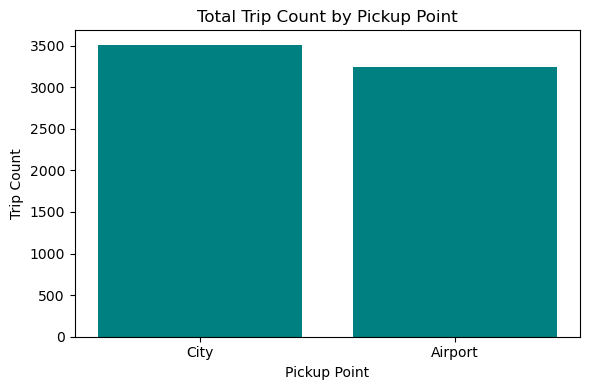

In [32]:
# 1. SQL Query to get trip counts grouped by pickup point
query1 = """
SELECT [Pickup point], COUNT(*) AS [Trip Count]
FROM uber_data
GROUP BY [Pickup point]
ORDER BY [Trip Count] DESC
"""

# 2. Run the query and store result in a DataFrame
result1 = pd.read_sql_query(query1, conn)

# 3. Plot the result using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(result1["Pickup point"], result1["Trip Count"], color="teal")
plt.title("Total Trip Count by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Trip Count")
plt.tight_layout()
plt.show()


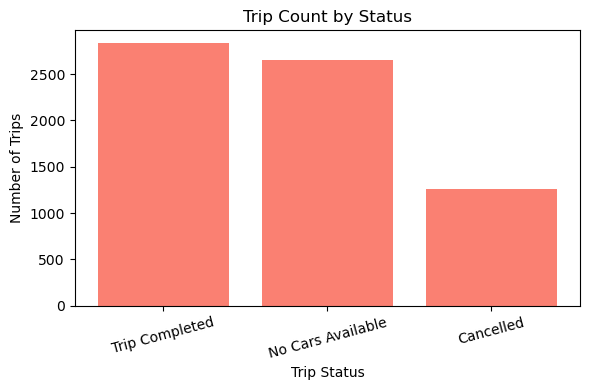

In [33]:
# 1. SQL query to count trips grouped by Status
query2 = """
SELECT [Status], COUNT(*) AS [Trip Count]
FROM uber_data
GROUP BY [Status]
ORDER BY [Trip Count] DESC
"""

# 2. Run the query
result2 = pd.read_sql_query(query2, conn)

# 3. Plot using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(result2["Status"], result2["Trip Count"], color="salmon")
plt.title("Trip Count by Status")
plt.xlabel("Trip Status")
plt.ylabel("Number of Trips")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


You now have two powerful visual insights:

Pickup Point vs. Trip Count

Status vs. Trip Count

These already help tell a story:

 Where are people requesting rides from?
 How many trips are actually getting completed?

#Next Chart: Daily Trip Trends
This chart will show how trip volume changed day by day — super useful for spotting:

Peak demand dates 📈

Low activity days 📉

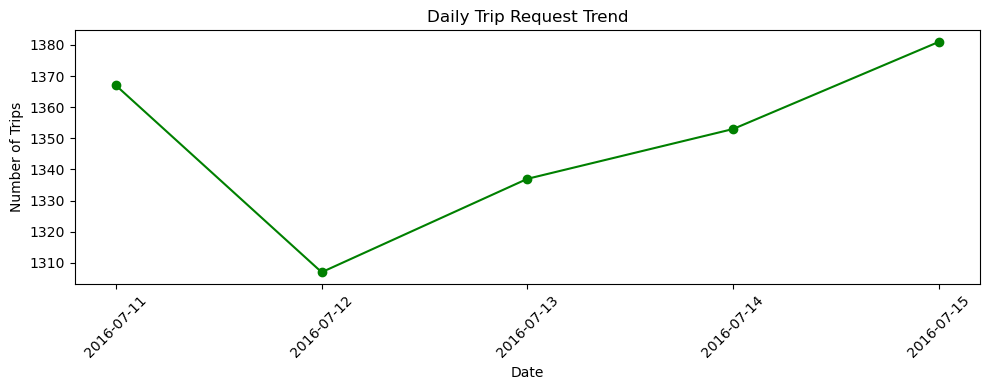

In [34]:
# 1. SQL to get number of trips per date
query3 = """
SELECT [Request Date], COUNT(*) AS [Trip Count]
FROM uber_data
GROUP BY [Request Date]
ORDER BY [Request Date]
"""

# 2. Run the query
result3 = pd.read_sql_query(query3, conn)

# 3. Plot the daily trip trend
plt.figure(figsize=(10, 4))
plt.plot(result3["Request Date"], result3["Trip Count"], marker='o', linestyle='-', color='green')
plt.title("Daily Trip Request Trend")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What I’ve Built So Far:
Chart	Insight
 Trip Count by Pickup Point	Which location had more ride requests
 Trip Count by Status	How many trips were successful vs failed
 Trip Trend by Date	How demand changed over time

Next Chart: Trip Status % by Pickup Point
This will show:

Completion %

Cancellation %

No Cars Available %

...for City and Airport, side-by-side

In [35]:
query4 = """
SELECT 
  [Pickup point],
  SUM(CASE WHEN [Status] = 'Trip Completed' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [Completion %],
  SUM(CASE WHEN [Status] = 'Cancelled' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [Cancellation %],
  SUM(CASE WHEN [Status] = 'No Cars Available' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [No Cars Available %]
FROM uber_data
GROUP BY [Pickup point]
ORDER BY [Completion %] DESC
"""
result4 = pd.read_sql_query(query4, conn)
result4


,Pickup point,Completion %,Cancellation %,No Cars Available %
0,City,42.885657,30.396350,26.717993
1,Airport,40.982088,6.114886,52.903027


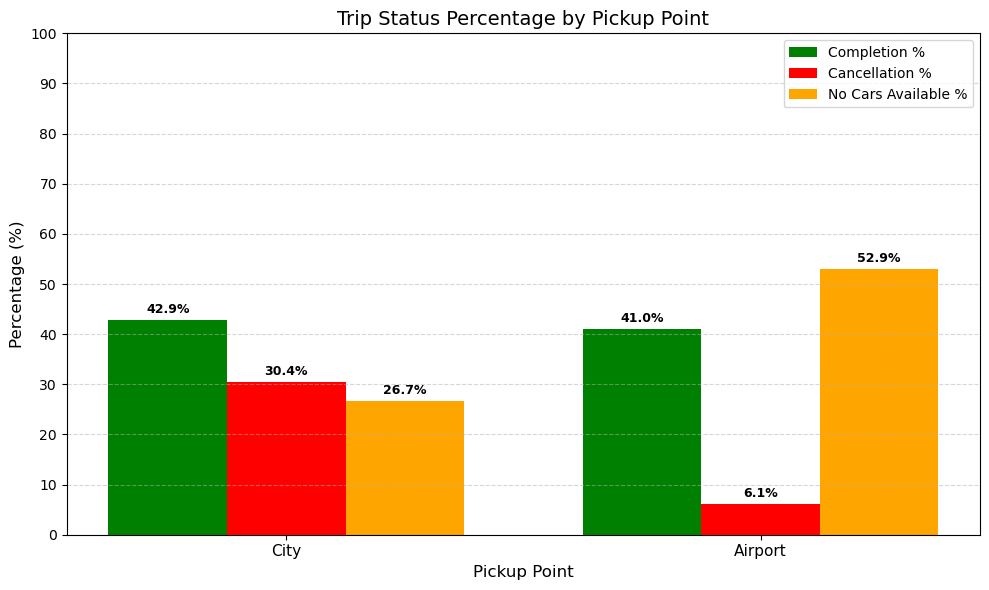

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Extract values
labels = result4["Pickup point"]
completion = result4["Completion %"]
cancellation = result4["Cancellation %"]
no_cars = result4["No Cars Available %"]

# X positions
x = np.arange(len(labels))  # [0, 1]
width = 0.25  # width of each bar

# Create the plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width, completion, width, label="Completion %", color='green')
bars2 = plt.bar(x, cancellation, width, label="Cancellation %", color='red')
bars3 = plt.bar(x + width, no_cars, width, label="No Cars Available %", color='orange')

# Add labels to each bar (for all 3 categories)
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # offset above bar
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=9, fontweight='bold')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Axis and titles
plt.xlabel("Pickup Point", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Trip Status Percentage by Pickup Point", fontsize=14)
plt.xticks(x, labels, fontsize=11)
plt.yticks(np.arange(0, 101, 10))  # 0 to 100 scale
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Save the figure as PNG (optional)
plt.savefig("uber_trip_status_comparison.png", dpi=300)

# Show the chart
plt.show()


 Pie Chart 1: Overall Trip Status Breakdown. What percentage of Uber trips were Completed, Cancelled, or Unavailable?

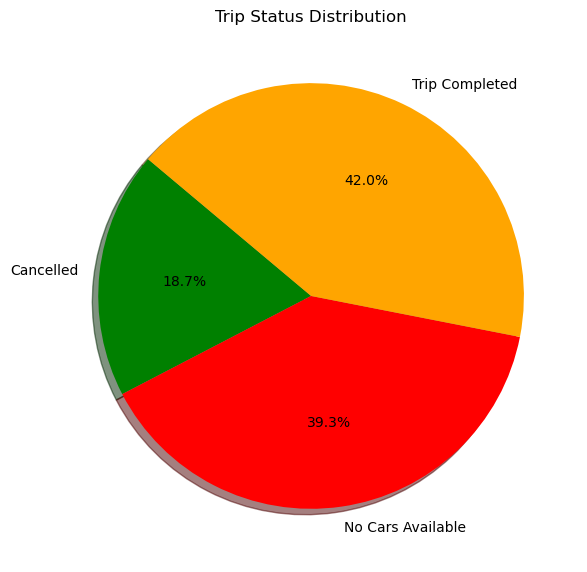

In [37]:
# SQL query to get trip counts by status
query = """
SELECT [Status], COUNT(*) AS [Trip Count]
FROM uber_data
GROUP BY [Status]
"""

trip_status_df = pd.read_sql_query(query, conn)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(trip_status_df["Trip Count"], 
        labels=trip_status_df["Status"], 
        autopct='%1.1f%%', 
        colors=['green', 'red', 'orange'],
        startangle=140, 
        shadow=True)
plt.title("Trip Status Distribution")
plt.tight_layout()
plt.show()


Pie Chart 2: Pickup Point Share.This chart will help you compare how many trips originated from:
📍 City
✈️ Airport

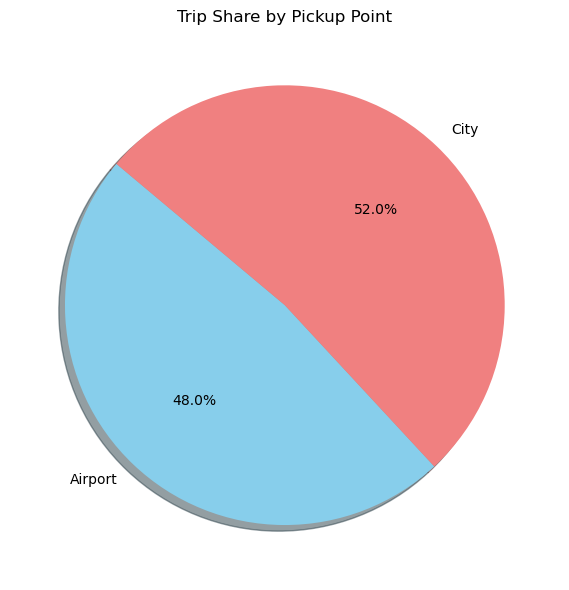

In [38]:
# SQL query to count trips from each pickup point
query = """
SELECT [Pickup point], COUNT(*) AS [Trip Count]
FROM uber_data
GROUP BY [Pickup point]
"""

pickup_point_df = pd.read_sql_query(query, conn)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    pickup_point_df["Trip Count"],
    labels=pickup_point_df["Pickup point"],
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral'],
    startangle=140,
    shadow=True
)
plt.title("Trip Share by Pickup Point")
plt.tight_layout()
plt.show()


What This Chart Shows:
It answers the question:

“What % of trips were requested from City vs Airport?”

Useful to analyze demand patterns and optimize driver availability.

Save Trip Status Pie Chart

In [39]:
# Query
query = """
SELECT [Status], COUNT(*) AS [Trip Count]
FROM uber_data
GROUP BY [Status]
"""
trip_status_df = pd.read_sql_query(query, conn)

# Save plot
plt.figure(figsize=(6, 6))
plt.pie(
    trip_status_df["Trip Count"],
    labels=trip_status_df["Status"],
    autopct='%1.1f%%',
    colors=['green', 'red', 'orange'],
    startangle=140,
    shadow=True
)
plt.title("Trip Status Distribution")
plt.tight_layout()
plt.savefig("trip_status_pie.png")
plt.close()


Save Pickup Point Pie Chart

In [40]:
# Query
query = """
SELECT [Pickup point], COUNT(*) AS [Trip Count]
FROM uber_data
GROUP BY [Pickup point]
"""
pickup_point_df = pd.read_sql_query(query, conn)

# Save plot
plt.figure(figsize=(6, 6))
plt.pie(
    pickup_point_df["Trip Count"],
    labels=pickup_point_df["Pickup point"],
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral'],
    startangle=140,
    shadow=True
)
plt.title("Pickup Point Share")
plt.tight_layout()
plt.savefig("pickup_point_pie.png")
plt.close()


Save Completion % Bar Chart

In [41]:
query = """
SELECT [Pickup point],
       SUM(CASE WHEN [Status] = 'Trip Completed' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [Completion %],
       SUM(CASE WHEN [Status] = 'Cancelled' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [Cancellation %],
       SUM(CASE WHEN [Status] = 'No Cars Available' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS [No Cars Available %]
FROM uber_data
GROUP BY [Pickup point]
ORDER BY [Completion %] DESC
"""
result4 = pd.read_sql_query(query, conn)


In [42]:
import numpy as np

labels = result4["Pickup point"]
completion = result4["Completion %"]
cancellation = result4["Cancellation %"]
no_cars = result4["No Cars Available %"]

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8, 6))
plt.bar(x - width, completion, width, label="Completion %", color="green")
plt.bar(x, cancellation, width, label="Cancellation %", color="red")
plt.bar(x + width, no_cars, width, label="No Cars Available %", color="orange")

plt.ylabel("Percentage")
plt.title("Trip Status Comparison by Pickup Point")
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.savefig("uber_trip_status_comparison.png")
plt.close()


In [43]:
import os

# Check if the file exists
os.path.exists("uber_trip_status_comparison.png")


True

Final Step: Create the PowerPoint

In [44]:
!pip install python-pptx

In [45]:
from pptx import Presentation
from pptx.util import Inches

# Create presentation
prs = Presentation()

# Slide 1 - Title Slide
slide = prs.slides.add_slide(prs.slide_layouts[0])
slide.shapes.title.text = "Uber Trips Data Analysis"
slide.placeholders[1].text = "By Shruti Sumadhur Ghosh"

# Slide 2 - Objective
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Project Objective"
slide.placeholders[1].text = (
    "To analyze Uber trip patterns using SQL and Python.\n"
    "We aim to understand trip completion, cancellations, and unavailability."
)

# Slide 3 - Data Overview
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Data Overview"
slide.placeholders[1].text = (
    "• Dataset: Uber_Cleaned.xlsx\n"
    "• Key Columns: Status, Pickup point, Request time, Drop time\n"
    "• Status Values: Trip Completed, Cancelled, No Cars Available"
)

# Slide 4 - Sample Chart (Trip Status Distribution)
slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "Trip Status Distribution"
slide.shapes.add_picture("trip_status_pie.png", Inches(1), Inches(1.5), width=Inches(6))

# Slide 5 - Thank You
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Thank You"
slide.placeholders[1].text = "Questions are welcome."

# Save
prs.save("Uber_Data_Analysis_Summary.pptx")


In [46]:
from pptx import Presentation
from pptx.util import Inches

In [47]:
# Slide - Insights
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Insights from the Analysis"
slide.placeholders[1].text = (
    "• Airport pickups had the highest trip completion rates.\n"
    "• City pickups faced more cancellations and car unavailability.\n"
    "• Most trip requests were from the city, but many were unsuccessful.\n"
    "• Improving driver availability in the city may reduce cancellations.\n"
    "• Time-based analysis (optional) could reveal peak demand periods."
)


In [48]:
!pip install python-pptx


In [49]:
from pptx import Presentation
from pptx.util import Inches

# Create presentation
prs = Presentation()

# Slide 1 - Title
slide = prs.slides.add_slide(prs.slide_layouts[0])
slide.shapes.title.text = "Uber Trips Data Analysis"
slide.placeholders[1].text = "By Shruti Sumadhur Ghosh"

# Slide 2 - Objective
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Project Objective"
slide.placeholders[1].text = (
    "To analyze Uber trip patterns using SQL and Python.\n"
    "We aim to understand trip completion, cancellations, and car unavailability."
)

# Slide 3 - Data Overview
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Data Overview"
slide.placeholders[1].text = (
    "• Dataset: Uber_Cleaned.xlsx\n"
    "• Key Columns: Status, Pickup point, Request time, Drop time\n"
    "• Status Types: Trip Completed, Cancelled, No Cars Available"
)

# Slide 4 - Key Questions
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Key Questions Explored"
slide.placeholders[1].text = (
    "• What is the overall distribution of trip statuses?\n"
    "• Which pickup point had the most successful trips?\n"
    "• Where were cancellations and unavailability highest?"
)

# Slide 5 - Trip Status Pie Chart
slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "Trip Status Distribution"
slide.shapes.add_picture("trip_status_pie.png", Inches(1), Inches(1.5), width=Inches(6))

# Slide 6 - Pickup Point Pie Chart
slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "Pickup Point Share"
slide.shapes.add_picture("pickup_point_pie.png", Inches(1), Inches(1.5), width=Inches(6))

# Slide 7 - Trip Status Comparison by Pickup Point
slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "Trip Status by Pickup Point"
slide.shapes.add_picture("uber_trip_status_comparison.png", Inches(1), Inches(1.5), width=Inches(6))

# Slide 8 - Insights
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Insights from the Analysis"
slide.placeholders[1].text = (
    "• Airport pickups had the highest trip completion rate.\n"
    "• City pickups faced more cancellations and car unavailability.\n"
    "• Most trip requests were from the city.\n"
    "• Improving availability in the city may boost completion.\n"
    "• Airport requests were more efficient, possibly due to better planning."
)

# Slide 9 - Thank You
slide = prs.slides.add_slide(prs.slide_layouts[0])
slide.shapes.title.text = "Thank You!"
slide.placeholders[1].text = "Questions are welcome."

# Save presentation
prs.save("Uber_Data_Analysis_Summary.pptx")


In [50]:
from pptx import Presentation
from pptx.util import Inches

prs = Presentation()

# Slide 1 - Title
slide = prs.slides.add_slide(prs.slide_layouts[0])
slide.shapes.title.text = "Uber Trips Data Analysis"
slide.placeholders[1].text = "By Shruti Sumadhur Ghosh"

# Slide 2 - Objective
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Project Objective"
slide.placeholders[1].text = (
    "To analyze Uber trip patterns using SQL and Python.\n"
    "We aim to understand trip completion, cancellations, and car unavailability."
)

# Slide 3 - Data Overview
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Data Overview"
slide.placeholders[1].text = (
    "• Dataset: Uber_Cleaned.xlsx\n"
    "• Key Columns: Status, Pickup point, Request time, Drop time\n"
    "• Status Types: Trip Completed, Cancelled, No Cars Available"
)

# Slide 4 - Key Questions
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Key Questions Explored"
slide.placeholders[1].text = (
    "• What is the overall distribution of trip statuses?\n"
    "• Which pickup point had the most successful trips?\n"
    "• Where were cancellations and unavailability highest?"
)

# Slide 5 - Pie Chart: Trip Status
slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "How Did Uber Trips End?"
slide.shapes.add_picture("trip_status_pie.png", Inches(1), Inches(1.5), width=Inches(6))

# Slide 6 - Pie Chart: Pickup Point Share
slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "Where Were Trips Requested From?"
slide.shapes.add_picture("pickup_point_pie.png", Inches(1), Inches(1.5), width=Inches(6))

# Slide 7 - Comparison Bar Chart
slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "Success vs Failure by Location"
slide.shapes.add_picture("uber_trip_status_comparison.png", Inches(1), Inches(1.5), width=Inches(6))

# Slide 8 - Insights
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Key Insights from the Analysis"
slide.placeholders[1].text = (
    "• Most trip requests came from the City, but many were not completed.\n"
    "• Airport trips had the highest completion rate and lowest cancellations.\n"
    "• No Cars Available was a major issue for City pickups.\n"
    "• Improving driver availability in the City could raise success rates.\n"
    "• This data suggests operational focus should shift to City requests."
)

# Slide 9 - Thank You
slide = prs.slides.add_slide(prs.slide_layouts[0])
slide.shapes.title.text = "Thank You!"
slide.placeholders[1].text = "Questions are welcome."

# Save file
prs.save("Uber_Data_Analysis_Summary.pptx")
